In [21]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/google-casestudy-1-2022-2023/202202-divvy-tripdata.csv
/kaggle/input/google-casestudy-1-2022-2023/202212-divvy-tripdata.csv
/kaggle/input/google-casestudy-1-2022-2023/202208-divvy-tripdata.csv
/kaggle/input/google-casestudy-1-2022-2023/202203-divvy-tripdata.csv
/kaggle/input/google-casestudy-1-2022-2023/202205-divvy-tripdata.csv
/kaggle/input/google-casestudy-1-2022-2023/202206-divvy-tripdata.csv
/kaggle/input/google-casestudy-1-2022-2023/202301-divvy-tripdata.csv
/kaggle/input/google-casestudy-1-2022-2023/202211-divvy-tripdata.csv
/kaggle/input/google-casestudy-1-2022-2023/202201-divvy-tripdata.csv
/kaggle/input/google-casestudy-1-2022-2023/202209-divvy-publictripdata.csv
/kaggle/input/google-casestudy-1-2022-2023/202204-divvy-tripdata.csv
/kaggle/input/google-casestudy-1-2022-2023/202210-divvy-tripdata.csv
/kaggle/input/google-casestudy-1-2022-2023/202207-divvy-tripdata.csv


# **Cyclistic Case Study**

This case study explores the data of cyclistic bike users: casual riders and members of cylictic. People who opt for one-use pass or full-day pass are considered as casual riders whereas people who have annual membership are considered as members.
The aim of this case study to identify how casual riders and annual members use cyclistic bikes differently and how the casual riders can be converted to annual members, thereby gaining more profits since annual membership brings more profit than the casual riders.


# Steps followed while working on this case study
1. **Prepare** --> 
    * Download data 
    >> Google_CaseStudy_1_2022-2023 is the publicly available dataset that has been used for this case study. It has 13 .csv files that account for each month from 2022 Jan to 2023 Jan. We will be fetching only the files from Jan 2022 to Dec 2022.
    
    * Identify how it’s organized
    >> These are the columns that are present in the .csv files: 
    ride_id, rideable_type, started_at, ended_at, start_station_name, start_station_id, end_station_name, end_station_id, start_lat, start_lng, end_lat,end_lng, member_casual.
    
    * Sort and alter the data
    
2. **Process** -->
    * Check the data for errors  
    >> The data we have contains many negative values as well as non-required values. These rows were deleted before moving forward to another step.
    
    * Transform the data so you can work with it effectively - add columns, remove columns, alter the datatype of the columns
    >> Various columns that are not required were deleted: start_station_name, start_station_id, end_station_name, end_station_id, start_lat, start_lng, end_lat,end_lng
    >> Columns like: hour, month, dayofweek were added which would help more towards the analysis
    
    * Check for null or missing data and handle that 
    >> The data was checked for null or missing values but there was none
    
3. **Visualize** -->
    * Create various visualizations to understand the relation between different attributes
    >> graphs depicting relation between rider type and the length of the ride/the time of the ride and various other parameters were monitored.
    
    * Try different combinations to describe the scenario and come to conclusion
    >>Parameters such as ridable_type, member_casual, time, hour, month, day were studies upon

4. **Analyze** -->
    * Based on the visuals created, analyze and understand the relationship between the attributes like casual riders or members and the type of rides they take, the time taken by each of them and various other scenarios.
    >> Each graph that is created, gives a new view and the data is analyzed based upon that. It shows how members use the bikes differently from the casual riders and how we can use the data to help the casual riders in their favour.

5. **Conclusion** -->
    * Based on the analysis, provide a conclusion and suggestions on how we can solve the base problem - conversion of the casual riders to annual members
    >> Based on the visuals and the analysis, the conclusion and suggestions are made to include various types of payment plan options to attract the casual riders and convert into quater or annual member.

**Step 1: Install the required packages**

In [22]:
#Install all the required packages

import numpy as np         #installs numpy package
import pandas as pd        #installs pandas package
from pandas.api.types import CategoricalDtype
import seaborn as sns      #import for visualization
import matplotlib.pyplot as plt  #import for visualization

**Step 2: Prepare the Data**

This step covers the following things:
* Downloading the data 
* Combining Data into single file/dataframe to handle throughout the analysis process
* Understanding the data types and the fields in the dataframe

In [23]:
#Read the files from Jan 2022 to Dec 2022- since the data is already available on kaggle,
#we just added that onto our data for this notebook and 
#then can read it directly from our input

jan2022 = pd.read_csv("/kaggle/input/google-casestudy-1-2022-2023/202201-divvy-tripdata.csv")
feb2022 = pd.read_csv("/kaggle/input/google-casestudy-1-2022-2023/202202-divvy-tripdata.csv")
mar2022 = pd.read_csv("/kaggle/input/google-casestudy-1-2022-2023/202203-divvy-tripdata.csv")
apr2022 = pd.read_csv("/kaggle/input/google-casestudy-1-2022-2023/202204-divvy-tripdata.csv")
may2022 = pd.read_csv("/kaggle/input/google-casestudy-1-2022-2023/202205-divvy-tripdata.csv")
jun2022 = pd.read_csv("/kaggle/input/google-casestudy-1-2022-2023/202206-divvy-tripdata.csv")
jul2022 = pd.read_csv("/kaggle/input/google-casestudy-1-2022-2023/202207-divvy-tripdata.csv")
aug2022 = pd.read_csv("/kaggle/input/google-casestudy-1-2022-2023/202208-divvy-tripdata.csv")
sep2022 = pd.read_csv("/kaggle/input/google-casestudy-1-2022-2023/202209-divvy-publictripdata.csv")
oct2022 = pd.read_csv("/kaggle/input/google-casestudy-1-2022-2023/202210-divvy-tripdata.csv")
nov2022 = pd.read_csv("/kaggle/input/google-casestudy-1-2022-2023/202211-divvy-tripdata.csv")
dec2022 = pd.read_csv("/kaggle/input/google-casestudy-1-2022-2023/202212-divvy-tripdata.csv")


In [24]:
#combining all the datafiles into a single file (makes it easier to work with)

data_2022 = pd.concat([jan2022,feb2022,mar2022,apr2022,may2022,jun2022,jul2022,aug2022,sep2022,oct2022,nov2022,dec2022], ignore_index = True)

#display the data (displays first 5 and last 5 rows of the df)
data_2022


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5667712,43ABEE85B6E15DCA,classic_bike,2022-12-05 06:51:04,2022-12-05 06:54:48,Sangamon St & Washington Blvd,13409,Peoria St & Jackson Blvd,13158,41.883165,-87.651100,41.877642,-87.649618,member
5667713,F041C89A3D1F0270,electric_bike,2022-12-14 17:06:28,2022-12-14 17:19:27,Bernard St & Elston Ave,18016,Seeley Ave & Roscoe St,13144,41.949980,-87.714019,41.943403,-87.679618,member
5667714,A2BECB88430BE156,classic_bike,2022-12-08 16:27:47,2022-12-08 16:32:20,Wacker Dr & Washington St,KA1503000072,Green St & Madison St,TA1307000120,41.883143,-87.637242,41.881859,-87.649264,member
5667715,37B392960E566F58,classic_bike,2022-12-28 09:37:38,2022-12-28 09:41:34,Sangamon St & Washington Blvd,13409,Peoria St & Jackson Blvd,13158,41.883165,-87.651100,41.877642,-87.649618,member


In [25]:
#display the data_Type of each column
data_2022.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

**Step 3: Process the Data**

Until now we have collected the data and prepared it for our use by combining all the data files into a single file and analysing the important columns that are to be used for us.
Now we will process the data. Some key points that are covered in this step would be:
* >>Creating new columns
* >>Removing unwanted data
* >>Maintaing the datatypes consistency
* >>Deal with NA data

In [26]:
#convert the started_at and ended_at columns to datetime
data_2022['started_at'] = data_2022['started_at'].astype('datetime64')
data_2022['ended_at'] = data_2022['ended_at'].astype('datetime64')

# Coverting datatypes of columns
data_2022 = data_2022.astype({'ride_id':'string', 'rideable_type':'category', 'member_casual':'category'})

#Create new column: ride_length --> This column will give the entire ride duration
data_2022['ride_length'] = (data_2022['ended_at'] - data_2022['started_at'])/pd.Timedelta(minutes=1)
data_2022['ride_length'] = data_2022['ride_length'].astype('int32')

#Drop unwanted columns from the dataframe
data_2022 = data_2022.drop(columns=['start_station_name', 'start_station_id', 'end_station_name', 'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng'])

#display the data_Type of each column
data_2022.dtypes

ride_id                  string
rideable_type          category
started_at       datetime64[ns]
ended_at         datetime64[ns]
member_casual          category
ride_length               int32
dtype: object

In [27]:
data_2022.sort_values(by = 'ride_length')

,ride_id,rideable_type,started_at,ended_at,member_casual,ride_length
4305947,E137518FFE807752,electric_bike,2022-09-28 11:04:32,2022-09-21 06:31:11,member,-10353
4743742,918F745F62CAC29E,classic_bike,2022-10-13 14:42:10,2022-10-13 11:53:28,member,-168
2095200,38B9F148CE80499B,electric_bike,2022-06-07 19:23:03,2022-06-07 17:05:38,casual,-137
1635637,B897BE02B21FA75E,electric_bike,2022-06-07 19:15:39,2022-06-07 17:05:37,casual,-130
1810805,BF114472ABA0289C,electric_bike,2022-06-07 19:14:47,2022-06-07 17:05:42,member,-129
...,...,...,...,...,...,...
2905537,70835A30C542BA2E,docked_bike,2022-07-09 01:02:46,2022-08-01 19:11:35,casual,34208
286843,23697816035F9A8F,docked_bike,2022-03-05 19:08:58,2022-03-29 15:43:02,casual,34354
2119596,94DD1FB2367EA8B6,docked_bike,2022-06-15 07:56:59,2022-07-10 04:57:37,casual,35820
1464697,DCFE0DB8022DFABC,docked_bike,2022-05-08 00:28:53,2022-06-02 04:46:41,casual,36257


As can be seen the ride_length here is a negative number and it appears because of wrong values in started_at and ended_at columns.
Hence, these negative values must be removed from our dataframe.

Also, we will remove any ride_length that is less than 1 min.

In [28]:
#Removing the rows where ride_length is negative or less than one
data_2022 = data_2022[data_2022['ride_length'] > 1]
data_2022.sort_values(by = 'ride_length')

,ride_id,rideable_type,started_at,ended_at,member_casual,ride_length
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,casual,2
3612043,00483335FA8C8011,classic_bike,2022-08-01 12:47:50,2022-08-01 12:50:18,member,2
3612041,A6071AFC0C92789E,classic_bike,2022-08-11 12:47:34,2022-08-11 12:50:20,member,2
4864192,972F08E0FB607A9D,classic_bike,2022-10-15 15:26:47,2022-10-15 15:29:31,casual,2
5443198,EE68E08054711F82,electric_bike,2022-11-08 13:07:08,2022-11-08 13:09:17,member,2
...,...,...,...,...,...,...
2905537,70835A30C542BA2E,docked_bike,2022-07-09 01:02:46,2022-08-01 19:11:35,casual,34208
286843,23697816035F9A8F,docked_bike,2022-03-05 19:08:58,2022-03-29 15:43:02,casual,34354
2119596,94DD1FB2367EA8B6,docked_bike,2022-06-15 07:56:59,2022-07-10 04:57:37,casual,35820
1464697,DCFE0DB8022DFABC,docked_bike,2022-05-08 00:28:53,2022-06-02 04:46:41,casual,36257


In [29]:
#Adding new "month" column derived from started_at column
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
data_2022['month'] = data_2022['started_at'].dt.month_name()
data_2022['month'] = data_2022['month'].astype(CategoricalDtype(categories=month, ordered=False))
#this sets the data in sorted order according to month from Jan-Dec

#Adding new "day" column derived from started_at column
days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
data_2022['day'] = data_2022['started_at'].dt.day_name()
data_2022['day'] = data_2022['day'].astype(CategoricalDtype(categories=days, ordered=False))

#Adding new "hour" column derived from started_at column
data_2022['hour'] = data_2022['started_at'].dt.hour

# Coverting datatypes of column
data_2022 = data_2022.astype({'hour':'int32'})
data_2022.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5445473 entries, 0 to 5667716
Data columns (total 9 columns):
 #   Column         Dtype         
---  ------         -----         
 0   ride_id        string        
 1   rideable_type  category      
 2   started_at     datetime64[ns]
 3   ended_at       datetime64[ns]
 4   member_casual  category      
 5   ride_length    int32         
 6   month          category      
 7   day            category      
 8   hour           int32         
dtypes: category(4), datetime64[ns](2), int32(2), string(1)
memory usage: 228.5 MB


In [30]:
data_2022.head()

,ride_id,rideable_type,started_at,ended_at,member_casual,ride_length,month,day,hour
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,casual,2,January,Thursday,11
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,casual,4,January,Monday,8
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,member,4,January,Tuesday,4
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,casual,14,January,Tuesday,0
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,member,6,January,Thursday,1


**Step 4 & 5: Visualize and Analyse the Data**
​

The data is finally processed and it can be used to visualize. From the visualization we will identify the relations between the parameters. These steps are dependent and hence will be performed together. For each visualization we will do the analysis after understanding the visualization

* Create visualzation to understand how each type of rider uses the bike
* Create visualzation to understand what is the avg time, each type of rider uses the ride for
* Create visualzation to understand when do the riders use the bike most
* Create visualzation to understand who uses the bike rides more 
* Create visualzation to understand who uses what type of bike more 

1. ***Total Ride time evaluated for Members vs Casual Riders***

[Text(0.5, 1.0, 'Ride Length vs Member_Casual')]

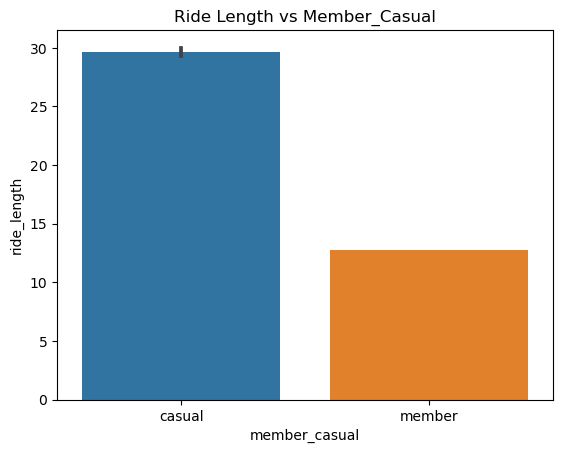

In [36]:
#A general view to see time distribution between type of riders and ride_time

sns.barplot(data = data_2022, x ='member_casual', y = 'ride_length').set(title='Ride Length vs Member_Casual')

* **The Above graph shows that the casual members take longer rides (almost double time) than the annual members**

**2. Total number of rides in a year evaluated for Members vs Casual Riders****

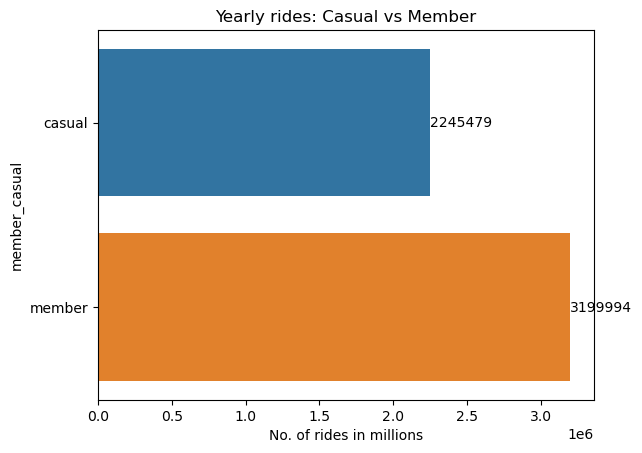

In [54]:
#The total number of rides taken by each type of rider

#sns.set_theme(rc={'axes.formatter.limits': (-8, 9)})
ax = sns.countplot(data=data_2022, y = 'member_casual')
for label in ax.containers:
    #ax.bar_label(label)
    ax.bar_label(ax.containers[0], fmt = '%d')
    ax.set_xlabel("No. of rides in millions")
    ax.set_title("Yearly rides: Casual vs Member")
plt.show()

**The above graph displays the total number of member as well as causal riders.
It can be seen that the number of annual members taking rides is more than casual riders.
Also, from the above 2 graphs we can see that**
1. Annual members take more number of rides
2. But the ride time of casual riders is more

***3. Total number of rides in a month evaluated for Members vs Casual Riders***

In [33]:
#Number of rides taken each month by the type of rider
#data_2022.sort_values(by='month',inplace=False) 
monthly_ride = pd.pivot_table(data_2022,
              index = ['month', 'member_casual'],
              values = 'ride_id',
              aggfunc = ['count'],
              margins = True,
              margins_name = 'Total Count')
#monthly_ride = monthly_ride.loc[(monthly_ride != 0).any(axis=1)]
monthly_ride

count
                           ride_id
month       member_casual         
January     casual           17950
            member           81727
February    casual           20758
            member           89827
March       casual           87562
            member          185746
April       casual          122907
            member          233120
May         casual          272207
            member          339729
June        casual          357829
            member          384696
July        casual          392540
            member          400106
August      casual          346495
            member          409312
September   casual          286477
            member          387251
October     casual          201042
            member          333112
November    casual           96797
            member          225706
December    casual           42915
            member          129662
Total Count                5445473

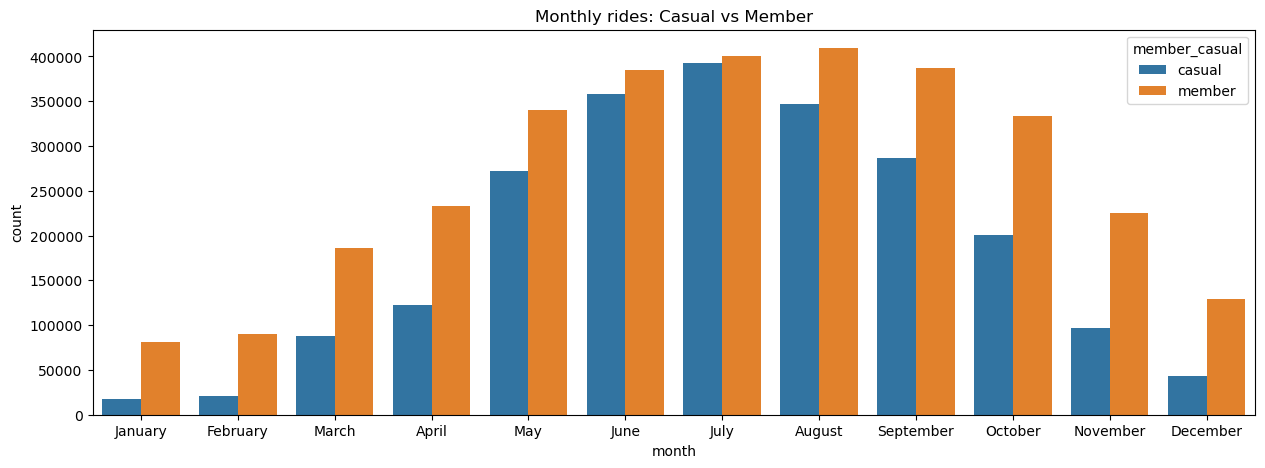

In [34]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(x='month', hue='member_casual', data=data_2022, ax=ax)
ax.set_title("Monthly rides: Casual vs Member")
plt.show()

**As can be seen from the above graph, during the summer season, the rides taken by members and casual riders are quite similar, whereas during non-peak seasons, the member riders take more rides.**

***4. Total number of rides in a day evaluated for Members vs Casual Riders***

In [35]:
#Number of rides taken each day by the type of rider
daily_ride = pd.pivot_table(data_2022,
              index = ['day', 'member_casual'],
              values = 'ride_id',
              aggfunc = ['count'],
              margins = True,
              margins_name = 'Total Count')
daily_ride

count
                           ride_id
day         member_casual         
Sunday      casual          376234
            member          370069
Monday      casual          268543
            member          452537
Tuesday     casual          255070
            member          496312
Wednesday   casual          265230
            member          501340
Thursday    casual          299233
            member          508999
Friday      casual          323516
            member          446779
Saturday    casual          457653
            member          423958
Total Count                5445473

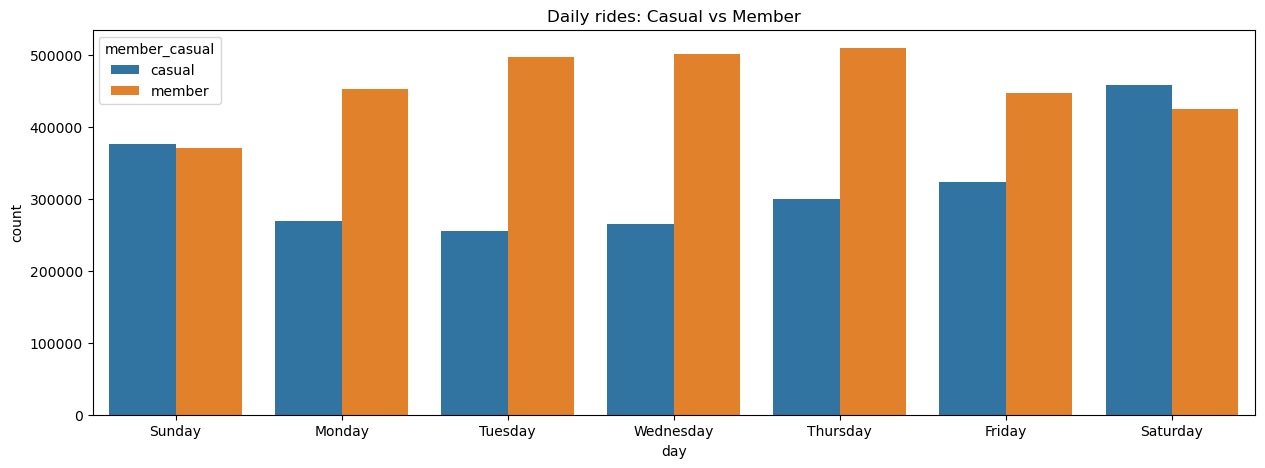

In [49]:
fig = plt.subplots(figsize=(15, 5))
ax = sns.countplot(x='day', hue='member_casual', data=data_2022)
ax.set_title("Daily rides: Casual vs Member")
plt.show()

**As can be seen from the above graph, during the weekends i.e. Saturday and Sunday, the rides taken by members and casual riders are quite similar, whereas during weekdays i.e. between Monday to Friday, the member riders take more rides.**

***5. Total number of rides in an hour evaluated for Members vs Casual Riders***

In [50]:
#Number of rides taken each Hour by the type of rider
hourly_ride = pd.pivot_table(data_2022,
              index = ['hour', 'member_casual'],
              values = 'ride_id',
              aggfunc = ['count'],
              margins = True,
              margins_name = 'Total Count')
hourly_ride

count
                           ride_id
hour        member_casual         
0           casual           44604
            member           34286
1           casual           29018
            member           21077
2           casual           17965
            member           12215
3           casual           10693
            member            7618
4           casual            7269
            member            8438
5           casual           11989
            member           30705
6           casual           28417
            member           86680
7           casual           49827
            member          165298
8           casual           67520
            member          196100
9           casual           69779
            member          137331
10          casual           90045
            member          129202
11          casual          117422
            member          154886
12          casual          139655
            member          178847
13          casual          145447
            member          177490
14          casual          154725
            member          176262
15          casual          172355
            member          211758
16          casual          191418
            member          279764
17          casual          213314
            member          336074
18          casual          191309
            member          273396
19          casual          146395
            member          197886
20          casual          108130
            member          138731
21          casual           92439
            member          108744
22          casual           83495
            member           82980
23          casual           62249
            member           54226
Total Count                5445473

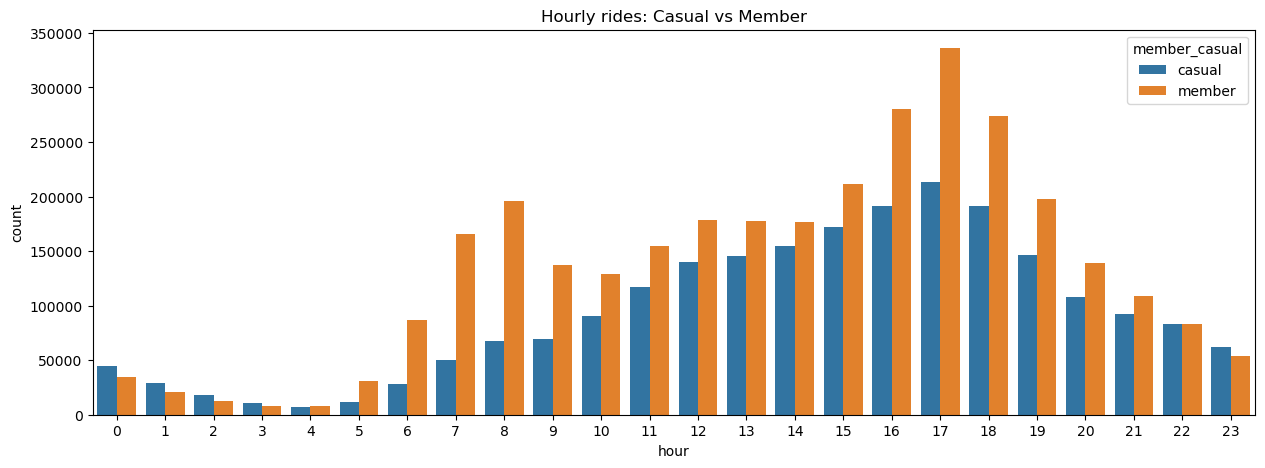

In [51]:
fig = plt.subplots(figsize=(15, 5))
ax = sns.countplot(x='hour', hue='member_casual', data=data_2022)
ax.set_title("Hourly rides: Casual vs Member")
plt.show()

**As can be seen from the above graph, during the peak-hours i.e. between early morning 6-10 and in the evening between 4-7pm, the members are taking more rides than the casual riders. During off hours like between 9pm to 4am, the number of rides between casual and members are simialr.**

***6. Type of rides taken by Members vs Casual Riders***

In [52]:
#Type of rides taken by the type of rider
ridable_type = pd.pivot_table(data_2022,
              index = ['rideable_type', 'member_casual'],
              values = 'ride_id',
              aggfunc = ['count'],
              margins = True,
              margins_name = 'Total Rides')
ridable_type

count
                             ride_id
rideable_type member_casual         
classic_bike  casual          869922
              member         1652459
docked_bike   casual          175113
              member               0
electric_bike casual         1200444
              member         1547535
Total Rides                  5445473

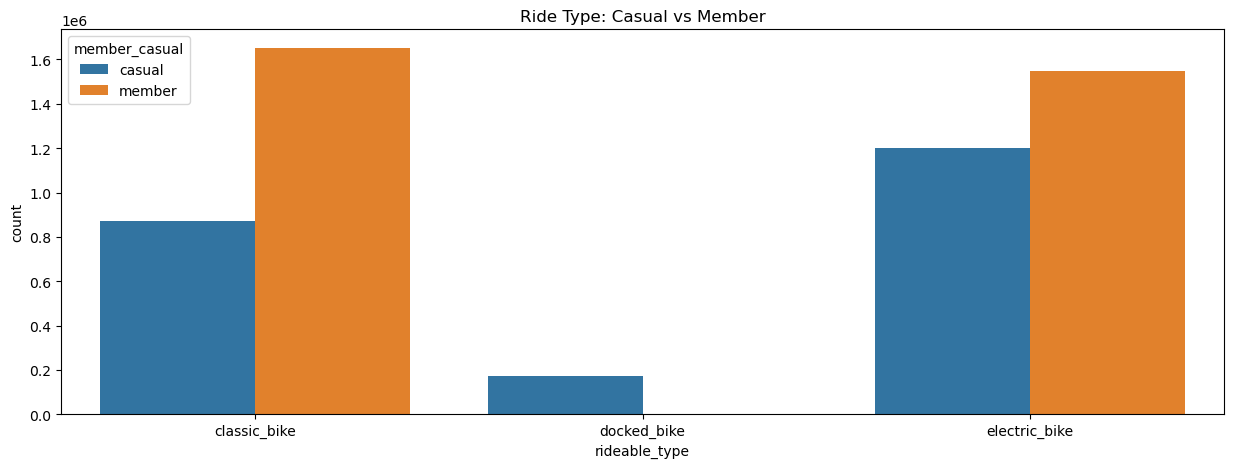

In [53]:
fig = plt.subplots(figsize=(15, 5))
ax = sns.countplot(x='rideable_type', hue='member_casual', data=data_2022)
ax.set_title("Ride Type: Casual vs Member")
plt.show()

* **Member riders prefer classic bike more**
* **Casual Riders prefer electric bike**

**Step 6: Conclusion**

**Members and Classic Riders use the bikes differently and for different purposes**

As can be seen from the above data
* Casual Riders use bikes for more longer times whereas members use it for daily purposes.
* The Summer season is the most preferred bike renting time for both the type of customers.
* For non-peak season, annual members use the bike more but for lesser period of time.
* For daily needs, annual members use the bike in peak-hours and during late nights, the use of both the riders remain similar.
* During weekends, the use of bike rides for annual members as well as casual riders remain same.
* Casual Riders prefer electric bike whereas annual riders prefer classic bike assuming for daily purposes.

# Suggestions

* To convert the casual riders into annual members, packaged plans must be made that can cater to their needs.
* Quaterly based membership plan can be introduced that will attract more casual riders during the summer season as the demand is more.
* Similarly, we can attract the casual riders by giving them weekend discount if enrolled into the annual membership plans: these discounts could either be on the price per day or on the bike upgrades.
* Also, since casual members seem to take longer bike rides, we can introduce a plan that can offer overall discount to the annual customers when completed certain hours of bike ride. This can be a plus point for the causal riders to consider.